# Bootstrap intervals for machine learning predictions

In [2]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Load data

In [8]:
ds = read_csv(csv_path + 'diabetes.csv')
values = ds.values
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Build model and perform bootstrap
Pick an statistic (e.g.: accuracy score)

(array([ 12.,  26.,  92., 152., 215., 236., 165.,  68.,  25.,   9.]),
 array([0.625     , 0.63799669, 0.65099338, 0.66399007, 0.67698675,
        0.68998344, 0.70298013, 0.71597682, 0.72897351, 0.7419702 ,
        0.75496689]),
 <BarContainer object of 10 artists>)

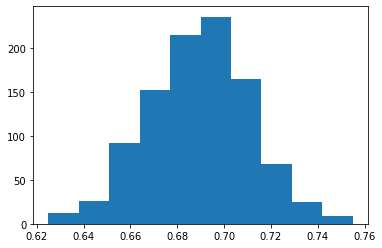

In [6]:
n_iterations = 1000
n_size = int(len(ds) * 0.50)

stats = list()
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])

    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    
    pred = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], pred)
    #print(score)
    stats.append(score)
    
pyplot.hist(stats);

### Confidence intervals

$\large ci = \mu \pm p_{\alpha} .\sigma $

In [13]:
alpha = 0.95

p = ((1.0-alpha)/2.0) * 100
lwr = max(0.0, np.percentile(stats, p))

p = (alpha+((1.0-alpha)/2.0)) * 100
upr = min(1.0, np.percentile(stats, p))

print('CI at ', alpha*100, '% : [', round(lwr*100,2), ',', round(upr*100,2), ']')

CI at  95.0 % : [ 64.73 , 73.12 ]


### Credits & Links

https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/  
https://machinelearningmastery.com/report-classifier-performance-confidence-intervals/